   objectid  g250m_id  commtypid            commtype  nhwhi_10  nhaa_10  \
0         1  144054.0          3    Maturing Suburbs     26.88     0.37   
1         2  115030.0          3    Maturing Suburbs     33.00     0.00   
2         3  232476.0          4  Developing Suburbs      2.66     0.00   
3         4  112471.0          4  Developing Suburbs      1.34     0.00   
4         5  148255.0          1          Inner Core      0.00     0.00   

   nhapi_10  lat_10  nhoth_10  ppi5  \
0      3.03    0.37      1.04     2   
1     14.59    0.31      2.10     1   
2      0.00    0.00      0.00     4   
3      0.04    0.02      0.00     0   
4      0.00    0.00      0.00     0   

                                               shape  
0  3C00000005000000080010006A69000020000000011000...  
1  3C00000005000000080010006A69000020000000011000...  
2  3C00000005000000080010006A69000020000000011000...  
3  3C00000005000000080010006A69000020000000011000...  
4  0C01000028000000080010006A690000B003

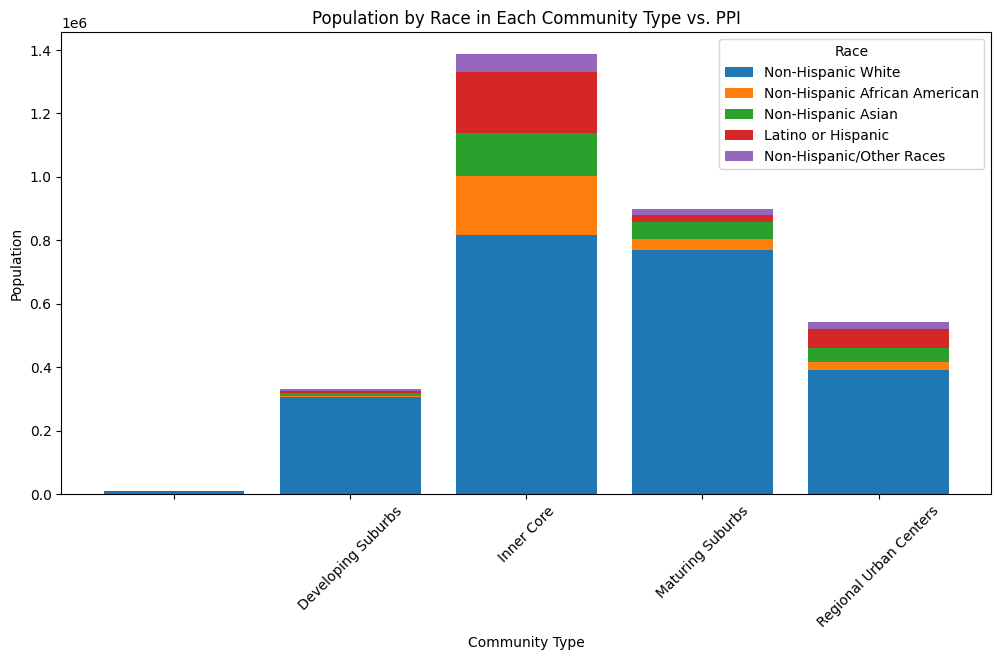

Maturing Suburbs          25848
Developing Suburbs        20919
Regional Urban Centers     7627
Inner Core                 6067
                           1715
Name: commtype, dtype: int64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from your CSV file
data = pd.read_csv("mapc.health_mapc_ppi_g250.csv")
data = data[data['commtype'].notna()]
print(data.head())

grouped_data = data.groupby('commtype')[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].sum()

race_aliases = {
    'nhwhi_10': 'Non-Hispanic White',
    'nhaa_10': 'Non-Hispanic African American',
    'nhapi_10': 'Non-Hispanic Asian',
    'lat_10': 'Latino or Hispanic',
    'nhoth_10': 'Non-Hispanic/Other Races'
}

# Create a stacked bar plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot each race category as a stacked bar
race_categories = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']
bottom = 0

for race in race_categories:
    plt.bar(grouped_data.index, grouped_data[race], label=race_aliases[race], bottom=bottom)
    bottom += grouped_data[race]

plt.xlabel('Community Type')
plt.ylabel('Population')
plt.title('Population by Race in Each Community Type vs. PPI')
plt.xticks(grouped_data.index, grouped_data.index, rotation=45)  # Set x-axis labels

# Add a legend
plt.legend(title="Race")

# Show the plot
plt.show()

unique_comm_types = data['commtype'].value_counts()
print(unique_comm_types)



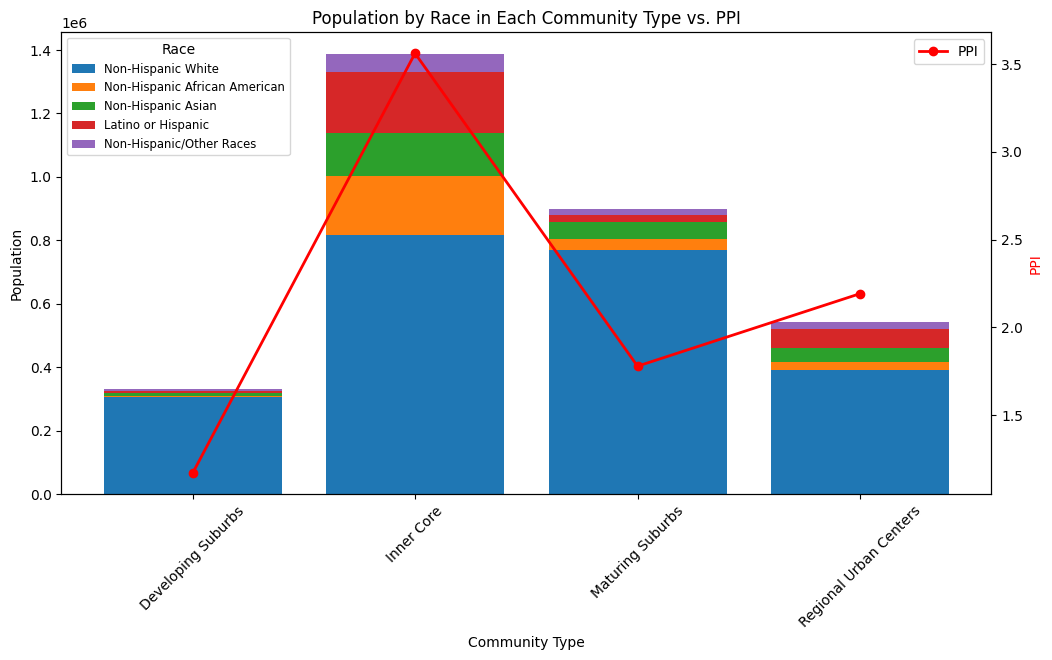

Maturing Suburbs          25848
Developing Suburbs        20919
Regional Urban Centers     7627
Inner Core                 6067
Name: commtype, dtype: int64
['Maturing Suburbs' 'Developing Suburbs' 'Inner Core'
 'Regional Urban Centers']


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("mapc.health_mapc_ppi_g250.csv")

# Remove rows with missing or unnamed 'commtype'
data = data[data['commtype'].notna()]
data = data[data['commtype'] != ' ']


grouped_data = data.groupby('commtype')[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].sum()

# Rest of your code remains the same
race_aliases = {
    'nhwhi_10': 'Non-Hispanic White',
    'nhaa_10': 'Non-Hispanic African American',
    'nhapi_10': 'Non-Hispanic Asian',
    'lat_10': 'Latino or Hispanic',
    'nhoth_10': 'Non-Hispanic/Other Races'
}

fig, ax1 = plt.subplots(figsize=(12, 6))  

race_categories = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']
bottom = 0

for race in race_categories:
    ax1.bar(grouped_data.index, grouped_data[race], label=race_aliases[race], bottom=bottom)
    bottom += grouped_data[race]

ax1.set_xlabel('Community Type')
ax1.set_ylabel('Population')
ax1.set_title('Population by Race in Each Community Type vs. PPI')
ax1.set_xticks(grouped_data.index)
ax1.set_xticklabels(grouped_data.index, rotation=45)  
ax1.legend(title="Race", loc="upper left", fontsize='small')

ax2 = ax1.twinx()
ppi_data = data.groupby('commtype')['ppi5'].mean()
ax2.plot(ppi_data.index, ppi_data, marker='o', color='red', label='PPI', linewidth=2)
ax2.set_ylabel('PPI', color='red')
ax2.legend(loc="upper right")

plt.show()

unique_comm_types = data['commtype'].value_counts()
print(unique_comm_types)
print(data['commtype'].unique())

